<a href="https://colab.research.google.com/github/mrdbourke/pytorch-deep-learning/blob/main/extras/exercises/01_pytorch_workflow_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 01. PyTorch Workflow Exercise Template

The following is a template for the PyTorch workflow exercises.

It's only starter code and it's your job to fill in the blanks.

Because of the flexibility of PyTorch, there may be more than one way to answer the question.

Don't worry about trying to be *right* just try writing code that suffices the question.

You can see one form of [solutions on GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions) (but try the exercises below yourself first!).

In [99]:
# Import necessary libraries
import torch
import matplotlib.pyplot as plt
import numpy as np
import sklearn

In [100]:
# Setup device-agnostic code
device = "cuda" if torch.cuda.is_available() else "CPU"
torch.__version__, device

('2.4.1+cu124', 'cuda')

## 1. Create a straight line dataset using the linear regression formula (`weight * X + bias`).
  * Set `weight=0.3` and `bias=0.9` there should be at least 100 datapoints total. 
  * Split the data into 80% training, 20% testing.
  * Plot the training and testing data so it becomes visual.

Your output of the below cell should look something like:
```
Number of X samples: 100
Number of y samples: 100
First 10 X & y samples:
X: tensor([0.0000, 0.0100, 0.0200, 0.0300, 0.0400, 0.0500, 0.0600, 0.0700, 0.0800,
        0.0900])
y: tensor([0.9000, 0.9030, 0.9060, 0.9090, 0.9120, 0.9150, 0.9180, 0.9210, 0.9240,
        0.9270])
```

Of course the numbers in `X` and `y` may be different but ideally they're created using the linear regression formula.

In [101]:
# Create the data parameters
def regression_formula (x, a=0.3 , b=0.9):
    return a*x+b;

# Make X and y using linear regression feature
X = torch.arange(0.0, 1.0, 0.005)
y = regression_formula(x=X)

print(f"Number of X samples: {len(X)}")
print(f"Number of y samples: {len(y)}")
print(f"First 10 X & y samples:\nX: {X[:10]}\ny: {y[:10]}")

Number of X samples: 200
Number of y samples: 200
First 10 X & y samples:
X: tensor([0.0000, 0.0050, 0.0100, 0.0150, 0.0200, 0.0250, 0.0300, 0.0350, 0.0400,
        0.0450])
y: tensor([0.9000, 0.9015, 0.9030, 0.9045, 0.9060, 0.9075, 0.9090, 0.9105, 0.9120,
        0.9135])


In [102]:
# Split the data into training and testing
import sklearn.model_selection

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(
    X, y, test_size=0.2, random_state=42)

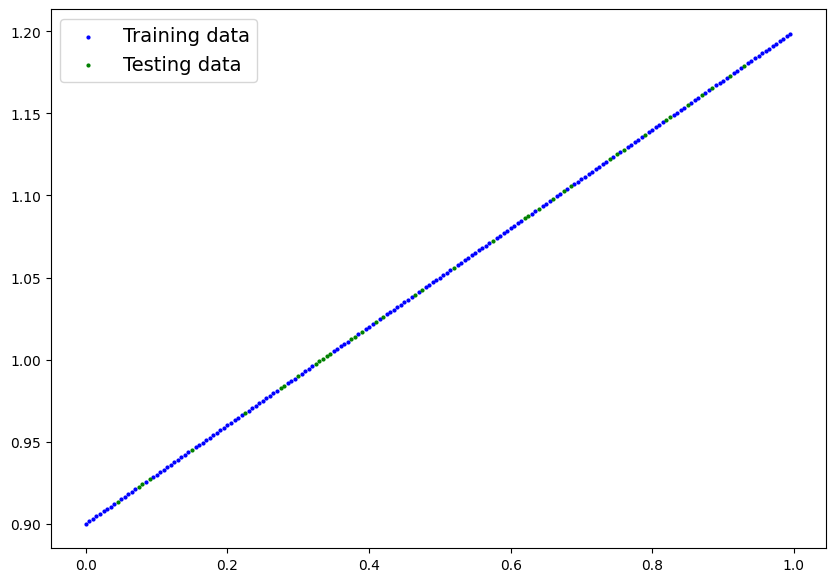

In [103]:
# Plot the training and testing data 
def plot_predictions(
    train_data = X_train.cpu(),
    train_labels = y_train.cpu(),
    test_data = X_test.cpu(),
    test_labels = y_test.cpu(),
    predictions = None
):
    """
    Plots training data, tests data and compares predictions.
    """
    plt.figure(figsize=(10, 7))
    
    # training data in blue
    plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
    
    # test data in green
    plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")
    
    if predictions is not None:
        # plot the prtedictions if they exist
        plt.scatter(test_data, predictions.cpu(), c="r", s=4, label="Predictions")
        
    # Show the legend
    plt.legend(prop={"size": 14})
    
plot_predictions()

## 2. Build a PyTorch model by subclassing `nn.Module`. 
  * Inside should be a randomly initialized `nn.Parameter()` with `requires_grad=True`, one for `weights` and one for `bias`. 
  * Implement the `forward()` method to compute the linear regression function you used to create the dataset in 1. 
  * Once you've constructed the model, make an instance of it and check its `state_dict()`.
  * **Note:** If you'd like to use `nn.Linear()` instead of `nn.Parameter()` you can.

In [104]:
# Create PyTorch linear regression model by subclassing nn.Module
class RegressionModel3(torch.nn.Module):
    def __init__(self, *args, **kwargs) -> None:
        super().__init__(*args, **kwargs)
        self.weights = torch.nn.Parameter(torch.randn(1), requires_grad=True)
        self.bias = torch.nn.Parameter(torch.randn(1), requires_grad=True)

    def forward(self, X: torch.Tensor) -> torch.Tensor:
        return self.weights * X + self.bias

In [105]:
# Instantiate the model and put it to the target device
model_02 = RegressionModel3()
model_02.to(device)
next(model_02.parameters()).device

device(type='cuda', index=0)

## 3. Create a loss function and optimizer using `nn.L1Loss()` and `torch.optim.SGD(params, lr)` respectively. 
  * Set the learning rate of the optimizer to be 0.01 and the parameters to optimize should be the model parameters from the model you created in 2.
  * Write a training loop to perform the appropriate training steps for 300 epochs.
  * The training loop should test the model on the test dataset every 20 epochs.

In [106]:
# Create the loss function and optimizer
loss_fn = torch.nn.L1Loss()
optimizer = torch.optim.SGD(params=model_02.parameters(), lr=0.01)

In [107]:

# Send data to target device

X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

epochs = 300

# Training loop
def training_loop():
# Train model for 300 epochs
    for epoch in range(0, epochs):
    
#   # Put model in train mode
        model_02.train()

#   # 1. Forward pass
        y_pred = model_02.forward(X_train)

#   # 2. Calculate loss
        loss = loss_fn(y_pred, y_train)

#   # 3. Zero gradients
        optimizer.zero_grad()

#   # 4. Backpropagation
        loss.backward()

#   # 5. Step the optimizer
        optimizer.step()

#   ### Perform testing every 20 epochs
        if epoch % 20 == 0:

#     # Put model in evaluation mode and setup inference context 
            model_02.eval()
            
            with torch.inference_mode():
              
#       # 1. Forward pass
                y_test_pred = model_02.forward(X_test)
                
#       # 2. Calculate test loss
                test_loss = loss_fn(y_test_pred, y_test)
                
#       # Print out what's happening
                print(f"Epoch: {epoch} | Train loss: {loss:.3f} | Test loss: {test_loss:.3f}")
                
                
training_loop()     

Epoch: 0 | Train loss: 0.176 | Test loss: 0.149
Epoch: 20 | Train loss: 0.149 | Test loss: 0.130
Epoch: 40 | Train loss: 0.136 | Test loss: 0.119
Epoch: 60 | Train loss: 0.125 | Test loss: 0.110
Epoch: 80 | Train loss: 0.115 | Test loss: 0.101
Epoch: 100 | Train loss: 0.104 | Test loss: 0.092
Epoch: 120 | Train loss: 0.094 | Test loss: 0.083
Epoch: 140 | Train loss: 0.084 | Test loss: 0.074
Epoch: 160 | Train loss: 0.074 | Test loss: 0.065
Epoch: 180 | Train loss: 0.063 | Test loss: 0.056
Epoch: 200 | Train loss: 0.053 | Test loss: 0.047
Epoch: 220 | Train loss: 0.043 | Test loss: 0.037
Epoch: 240 | Train loss: 0.032 | Test loss: 0.028
Epoch: 260 | Train loss: 0.022 | Test loss: 0.019
Epoch: 280 | Train loss: 0.012 | Test loss: 0.010


## 4. Make predictions with the trained model on the test data.
  * Visualize these predictions against the original training and testing data (**note:** you may need to make sure the predictions are *not* on the GPU if you want to use non-CUDA-enabled libraries such as matplotlib to plot).

In [108]:
# Make predictions with the model
with torch.inference_mode():
    predictions = model_02.forward( X_test)


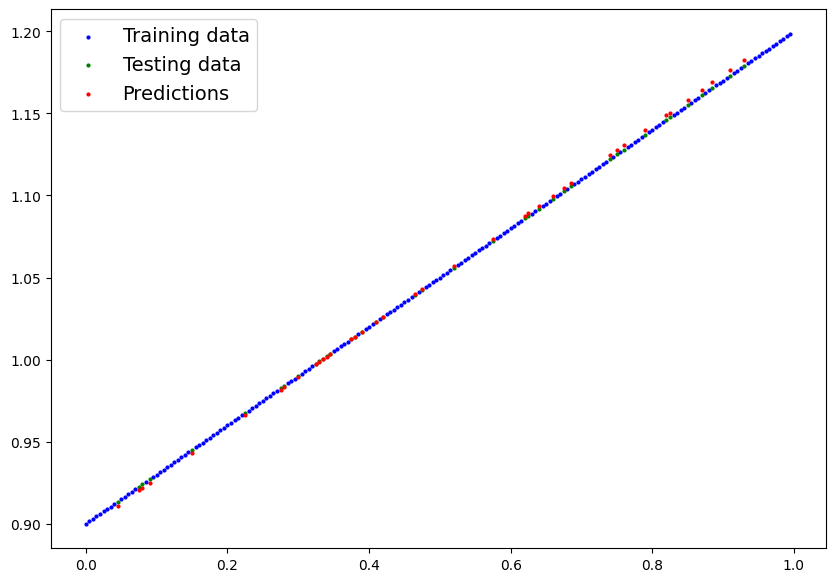

In [109]:
# Plot the predictions (these may need to be on a specific device)
plot_predictions(predictions=predictions)

## 5. Save your trained model's `state_dict()` to file.
  * Create a new instance of your model class you made in 2. and load in the `state_dict()` you just saved to it.
  * Perform predictions on your test data with the loaded model and confirm they match the original model predictions from 4.

In [110]:
from pathlib import Path

# 1. Create models directory 
PATH = Path("./models")
PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path 
model_name = "workflow_model_02.pth"
PATH_MODEL = Path(f"./models/{model_name}")

# 3. Save the model state dict
torch.save(model_02.state_dict(), PATH_MODEL)

In [111]:
# Create new instance of model and load saved state dict (make sure to put it on the target device)
dict = torch.load(PATH_MODEL, weights_only=True)
model_loaded = RegressionModel3()
model_loaded.load_state_dict(dict)
model_loaded.state_dict()

OrderedDict([('weights', tensor([0.3069])), ('bias', tensor([0.8973]))])

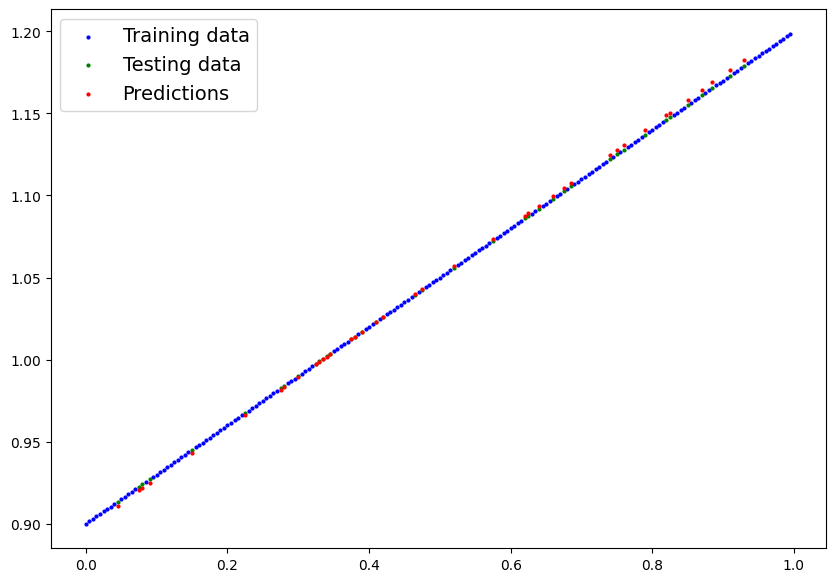

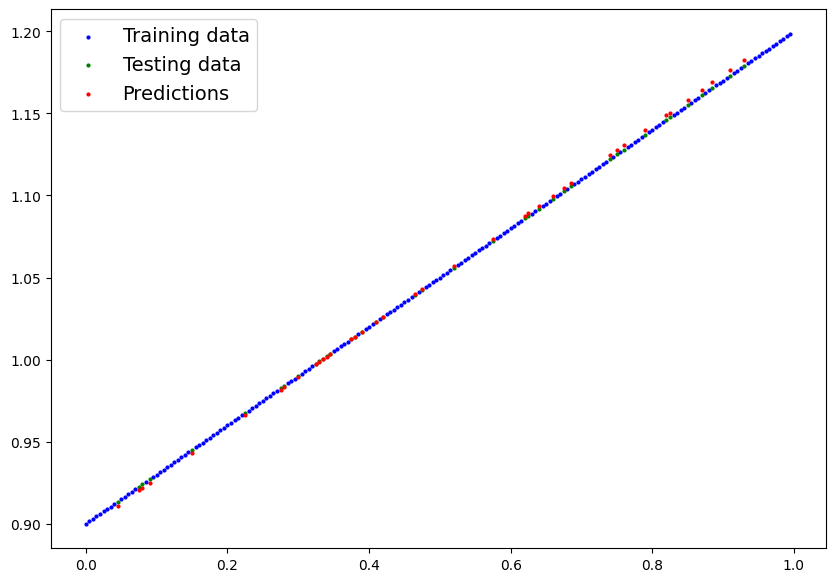

In [112]:
# Make predictions with loaded model and compare them to the previous

with torch.inference_mode():
    predictions2 = model_loaded.forward( X_test.cpu())
    
plot_predictions(predictions=predictions)
plot_predictions(predictions=predictions2)
